In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
"replacing previous import 'GenomicRanges::union' by 'dplyr::union' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::intersect' by 'dplyr::intersect' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::setdiff' by 'dplyr::setdiff' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::tail' by 'utils::tail' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::head' by 'utils::head' when loading 'Sierra'"


In [2]:
extdata_path <- system.file("extdata",package = "Sierra")
reference.file <- paste0(extdata_path,"/Vignette_cellranger_genes_subset.gtf")
junctions.file <- paste0(extdata_path,"/Vignette_example_TIP_sham_junctions.bed")
bamfile <- c(paste0(extdata_path,"/Vignette_example_TIP_sham.bam"),
            paste0(extdata_path,"/Vignette_example_TIP_MI.bam") )
whitelist.bc.file <- c(paste0(extdata_path,"/example_TIP_sham_whitelist_barcodes.tsv"),
            paste0(extdata_path,"/example_TIP_MI_whitelist_barcodes.tsv"))

In [8]:

peak.output.file <- c("Vignette_example_TIP_sham_peaks.txt",
                      "Vignette_example_TIP_MI_peaks.txt")
FindPeaks(output.file = peak.output.file[1],   # output filename
          gtf.file = reference.file,           # gene model as a GTF file
          bamfile = bamfile[1],                # BAM alignment filename.
          junctions.file = junctions.file,     # BED filename of splice junctions exising in BAM file. 
          ncores = 1)                          # number of cores to use
          
          
FindPeaks(output.file = peak.output.file[2],   # output filename
          gtf.file = reference.file,           # gene model as a GTF file
          bamfile = bamfile[2],                # BAM alignment filename.
          junctions.file = junctions.file,     # BED filename of splice junctions exising in BAM file. 
          ncores = 1) 

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"some CDS phases are missing or not between 0 and 2"
OK

15 gene entries to process

There are 46 unfiltered sites and 45 filtered sites

There are 45 sites following duplicate removal

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"some CDS phases are missing or not between 0 and 2"
OK

15 gene entries to process

There are 35 unfiltered sites and 35 filtered sites

There are 35 sites following duplicate removal



In [9]:

### Read in the tables, extract the peak names and run merging ###

peak.dataset.table = data.frame(Peak_file = peak.output.file,
  Identifier = c("TIP-example-Sham", "TIP-example-MI"), 
  stringsAsFactors = FALSE)

peak.merge.output.file = "TIP_merged_peaks.txt"
MergePeakCoordinates(peak.dataset.table, output.file = peak.merge.output.file, ncores = 1)



[1] "Performing internal peak merging for TIP-example-Sham"
[1] "Performing internal peak merging for TIP-example-MI"
[1] "Comparing peaks from TIP-example-Sham to remaining data-sets"
[1] "Comparing peaks from TIP-example-MI to remaining data-sets"


In [10]:
count.dirs <- c("example_TIP_sham_counts", "example_TIP_MI_counts")

#sham data set
CountPeaks(peak.sites.file = peak.merge.output.file, 
           gtf.file = reference.file,
           bamfile = bamfile[1], 
           whitelist.file = whitelist.bc.file[1],
           output.dir = count.dirs[1], 
           countUMI = TRUE, 
           ncores = 4)

# MI data set
CountPeaks(peak.sites.file = "TIP_merged_peaks.txt", 
           gtf.file = reference.file,
           bamfile = bamfile[2], 
           whitelist.file = whitelist.bc.file[2],
           output.dir = count.dirs[2], 
           countUMI = TRUE, 
           ncores = 4)


There are 1000 whitelist barcodes.

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"some CDS phases are missing or not between 0 and 2"
OK

There are 46  sites

Doing counting for each site...

There are 1000 whitelist barcodes.

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"some CDS phases are missing or not between 0 and 2"
OK

There are 46  sites

Doing counting for each site...



In [11]:
# As previously defined
peak.merge.output.file <- "TIP_merged_peaks.txt"
count.dirs <- c("example_TIP_sham_counts", "example_TIP_MI_counts")


# New definition
out.dir <- "example_TIP_aggregate"

# Now aggregate the counts for both sham and MI treatments
AggregatePeakCounts(peak.sites.file = peak.merge.output.file,
                    count.dirs = count.dirs,
                    exp.labels = c("Sham", "MI"),
                    output.dir = out.dir)

[1] "Aggregating counts for 46 peak coordinates"


In [12]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# Mouse genome (mm10)
BiocManager::install("BSgenome.Mmusculus.UCSC.mm10")

# As previously defined
peak.merge.output.file <- "TIP_merged_peaks.txt"
extdata_path <- system.file("extdata",package = "Sierra")
reference.file <- paste0(extdata_path,"/Vignette_cellranger_genes_subset.gtf")

# New definitions
genome <- BSgenome.Mmusculus.UCSC.mm10::BSgenome.Mmusculus.UCSC.mm10

AnnotatePeaksFromGTF(peak.sites.file = peak.merge.output.file, 
                     gtf.file = reference.file,
                     output.file = "TIP_merged_peak_annotations.txt", 
                     genome = genome)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'BSgenome.Mmusculus.UCSC.mm10'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'argparse', 'Biostrings', 'blob', 'broom', 'cli', 'credentials',
  'curl', 'e1071', 'ensembldb', 'future.apply', 'googlesheets4', 'haven',
  'isoband', 'jpeg', 'leiden', 'limma', 'MatrixGenerics', 'matrixStats',
  'parallelly', 'pillar', 'pryr', 'ranger', 'rbokeh', 'RcppAnnoy',
  'RcppArmadillo', 'readr', 'reprex', 'rmarkdown', 'RSQLite', 'Rttf2pt1',
  'rvest', 'spatstat.core', 'spatstat.geom', 'stringi', 'tibble', 'tinytex',
  'utf8', 'xfun'

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(

[1] "Annotating  46  peak coordinates."

Annotating 3' UTRs
Annotating 5' UTRs
Annotating introns
Annotating exons
Annotating CDS
Analysing genomic motifs surrounding peaks (this can take some time)
  |======================================================================| 100%


In [13]:
#Previous definitions
out.dir <- "example_TIP_aggregate"
extdata_path <- system.file("extdata",package = "Sierra")

#Read in the counts
peak.counts <- ReadPeakCounts(data.dir = out.dir)

#Read in peak annotations
peak.annotations <- read.table("TIP_merged_peak_annotations.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)
head(peak.annotations)

#Load precompiled gene-level object called 'genes.seurat'
load(paste0(extdata_path,"/TIP_vignette_gene_Seurat.RData"))

,seqnames,start,end,width,strand,gene_id,UTR3,UTR5,intron,exon,CDS,pA_motif,pA_stretch,pT_stretch,Junctions
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>
Sash1:10:8722219-8722812:-1,10,8722219,8722812,594,-,Sash1,YES,,,,,TRUE,FALSE,FALSE,no-junctions
Sash1:10:8813689-8814157:-1,10,8813689,8814157,469,-,Sash1,,,YES,,,FALSE,TRUE,FALSE,no-junctions
Lamp2:X:38419489-38419901:-1,X,38419489,38419901,413,-,Lamp2,YES,,,,,TRUE,FALSE,FALSE,no-junctions
Lamp2:X:38405042-38405480:-1,X,38405042,38405480,439,-,Lamp2,YES,,,,,TRUE,FALSE,FALSE,no-junctions
Lamp2:X:38455818-38456298:-1,X,38455818,38456298,481,-,Lamp2,,,YES,YES,YES,FALSE,FALSE,FALSE,no-junctions
Pecam1:11:106654217-106654585:-1,11,106654217,106654585,369,-,Pecam1,YES,,,,,TRUE,FALSE,FALSE,no-junctions


In [14]:
peaks.seurat <- PeakSeuratFromTransfer(peak.data = peak.counts, 
                                       genes.seurat = genes.seurat, 
                                       annot.info = peak.annotations, 
                                       min.cells = 0, min.peaks = 0)

[1] "Creating Seurat object with 46 peaks and 2000 cells"


Warning message:
"The following arguments are not used: row.names"


[1] "Preparing feature table for DEXSeq"
[1] "t-SNE coordinates added"
[1] "No UMAP coordinates detected"


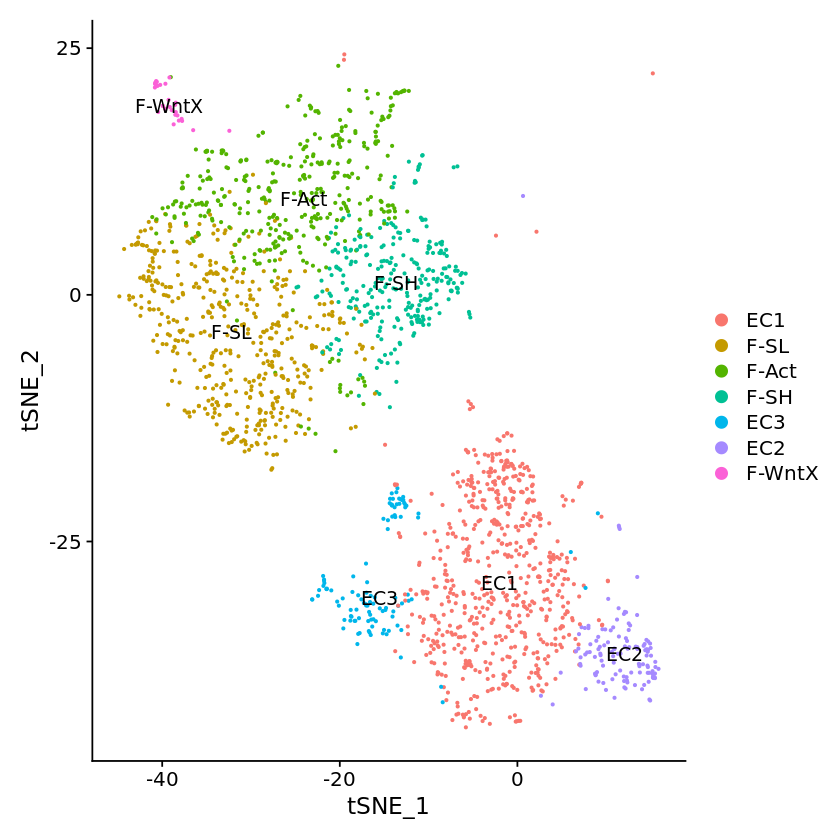

In [15]:
DimPlot(peaks.seurat, reduction = 'tsne', label = TRUE, pt.size = 0.5)

In [16]:
peaks.seurat$geneLvlID

AGCGTATAGTGAACGC-Sham GGATTACCATGGTCAT-Sham CCCTCCTAGCGCCTCA-Sham 
               F-WntX                   EC1                  F-SH 
TACAGTGAGCGGCTTC-Sham TAAGTGCTCAAGCCTA-Sham AACTTTCGTCCATCCT-Sham 
                 F-SL                   EC2                   EC2 
TAGTGGTAGACAAGCC-Sham TCAGATGCACTCTGTC-Sham AGTCTTTAGACGCACA-Sham 
                F-Act                  F-SL                  F-SL 
CATGCCTGTCTCCACT-Sham TTGACTTTCACCACCT-Sham TTGGAACGTAGATTAG-Sham 
                  EC1                  F-SL                   EC1 
CGTTCTGCAAGTAGTA-Sham GAGCAGACATAGAAAC-Sham AGCTCCTTCTAAGCCA-Sham 
                 F-SL                  F-SL                  F-SH 
GGTGAAGCAATAAGCA-Sham TACCTTAGTCAAACTC-Sham TTCGGTCTCAATCACG-Sham 
                  EC1                  F-SL                  F-SL 
CGGACGTGTACGAAAT-Sham CTTGGCTCAGGCGATA-Sham GGACATTGTGCAGACA-Sham 
               F-WntX                  F-SL                  F-SL 
CGCTTCAAGTTGAGAT-Sham GCTCTGTGTGTGACGA-Sham TGACAACTCTTCTGGC-Sham 
                  EC1                 F-Act                   EC1 
TGCCAAAGTATAGGTA-Sham GTCACGGGTGCACGAA-Sham TACACGACAGTCGTGC-Sham 
                 F-SH                  F-SL                   EC1 
TATGCCCTCGCGCCAA-Sham TTTACTGCAGCTCCGA-Sham TACTCGCAGAGTTGGC-Sham 
                 F-SH                  F-SL                   EC1 
AACCGCGTCATATCGG-Sham TTAGGCAGTCACACGC-Sham CGTTCTGCAAATTGCC-Sham 
                  EC1                  F-SL                  F-SH 
TAAACCGCACAGGCCT-Sham GCTGCTTGTGGCCCTA-Sham CATCGGGCAATAGAGT-Sham 
                 F-SL                  F-SL                   EC1 
GTAACGTCACGGACAA-Sham CCACGGACAACGCACC-Sham AGTAGTCTCTCAAGTG-Sham 
                F-Act                  F-SL                   EC1 
TTAACTCAGTGGACGT-Sham TGACTAGGTTCCAACA-Sham TTTACTGAGAACAATC-Sham 
                  EC1                 F-Act                  F-SL 
CGATGGCCATTCCTCG-Sham GCGGGTTTCCTGTACC-Sham ATTCTACTCACTTCAT-Sham 
                 F-SH                   EC1                 F-Act 
ATCTGCCTCTCGTATT-Sham AACTCCCAGGGTTTCT-Sham GCTGGGTGTTATCCGA-Sham 
                 F-SL                   EC2                 F-Act 
GTCACAATCTACCTGC-Sham CGAACATCAAGTCTAC-Sham TGTTCCGGTAACGACG-Sham 
                 F-SL                   EC1                   EC1 
AACACGTAGCCGGTAA-Sham CGAGAAGGTAGCCTCG-Sham CACACCTTCACTTATC-Sham 
                 F-SH                  F-SL                   EC1 
GAAATGATCAACGCTA-Sham TGGACGCAGCTACCTA-Sham GCTGCAGGTCGATTGT-Sham 
                  EC1                  F-SL                   EC2 
ACTTACTAGAGCTATA-Sham CATTATCGTCTGATTG-Sham GCACTCTTCACTTCAT-Sham 
                  EC1                  F-SL                  F-SH 
TAGCCGGGTATAGGGC-Sham TATGCCCGTCTTGATG-Sham CTCGAAAAGGGATCTG-Sham 
                  EC2                   EC1                  F-SL 
GGGAGATTCTCAAGTG-Sham CGGCTAGGTGACGCCT-Sham TCCCGATTCCTGTACC-Sham 
                 F-SL                  F-SH                   EC1 
GGAACTTCACGCTTTC-Sham CCACCTATCGGCGGTT-Sham TAAGCGTCAAGTCTGT-Sham 
                  EC1                 F-Act                  F-SL 
CGTAGCGGTTCCACAA-Sham ACTGATGGTGGTCCGT-Sham ATTACTCAGAGTAAGG-Sham 
                  EC1                  F-SL                  F-SH 
TCTGAGAAGCTATGCT-Sham GAGCAGACATACGCCG-Sham CTGATAGGTGATAAAC-Sham 
                 F-SL                 F-Act                 F-Act 
CAGGTGCTCATTGCGA-Sham ACACCGGCACGCTTTC-Sham CTTAGGAGTACACCGC-Sham 
                  EC3                  F-SH                  F-SH 
CGCCAAGCAGTAAGCG-Sham CGAACATAGACGACGT-Sham GATTCAGTCATGCAAC-Sham 
                 F-SH                  F-SL                   EC1 
GCCAAATTCCTCCTAG-Sham GGCGTGTGTGGTGTAG-Sham AACTCAGTCTTGGGTA-Sham 
                  EC1                   EC1                   EC1 
GTATTCTAGACTACAA-Sham AAACGGGCACTGTTAG-Sham GTCTCGTGTGTTAAGA-Sham 
                  EC1                F-WntX                  F-SL 
CTGCTGTGTGTAATGA-Sham ACACCAAAGCGACGTA-Sham TGAGAGGTCTGCAAGT-Sham 
                F-Act                  F-SH    

In [18]:
genes.seurat@active.ident

GGATTACCATGGTCAT-Sham CATGCCTGTCTCCACT-Sham TTGGAACGTAGATTAG-Sham 
                  EC1                   EC1                   EC1 
GGTGAAGCAATAAGCA-Sham CGCTTCAAGTTGAGAT-Sham TGACAACTCTTCTGGC-Sham 
                  EC1                   EC1                   EC1 
TACACGACAGTCGTGC-Sham TACTCGCAGAGTTGGC-Sham AACCGCGTCATATCGG-Sham 
                  EC1                   EC1                   EC1 
CATCGGGCAATAGAGT-Sham AGTAGTCTCTCAAGTG-Sham TTAACTCAGTGGACGT-Sham 
                  EC1                   EC1                   EC1 
GCGGGTTTCCTGTACC-Sham CGAACATCAAGTCTAC-Sham TGTTCCGGTAACGACG-Sham 
                  EC1                   EC1                   EC1 
CACACCTTCACTTATC-Sham GAAATGATCAACGCTA-Sham ACTTACTAGAGCTATA-Sham 
                  EC1                   EC1                   EC1 
TATGCCCGTCTTGATG-Sham TCCCGATTCCTGTACC-Sham GGAACTTCACGCTTTC-Sham 
                  EC1                   EC1                   EC1 
CGTAGCGGTTCCACAA-Sham GATTCAGTCATGCAAC-Sham GCCAAATTCCTCCTAG-Sham 
                  EC1                   EC1                   EC1 
GGCGTGTGTGGTGTAG-Sham AACTCAGTCTTGGGTA-Sham GTATTCTAGACTACAA-Sham 
                  EC1                   EC1                   EC1 
TACTCATTCTTAGCCC-Sham GTTCATTCAGGGTATG-Sham CGATGGCTCCGTAGTA-Sham 
                  EC1                   EC1                   EC1 
CATCGGGGTACAAGTA-Sham CTACATTGTGTGGTTT-Sham GACAGAGCATTACCTT-Sham 
                  EC1                   EC1                   EC1 
TAGAGCTGTCAAAGCG-Sham ACATACGTCACCTTAT-Sham ACTGAGTAGCGCTTAT-Sham 
                  EC1                   EC1                   EC1 
TGAGAGGCAGTATCTG-Sham GCCTCTATCACGGTTA-Sham TGAAAGACAATACGCT-Sham 
                  EC1                   EC1                   EC1 
ACTTTCAGTCTACCTC-Sham GCCTCTAGTAATCACC-Sham AAAGATGAGCGTGAGT-Sham 
                  EC1                   EC1                   EC1 
TCACAAGAGTACCGGA-Sham AGCCTAATCTTAGCCC-Sham TGCGCAGGTAACGCGA-Sham 
                  EC1                   EC1                   EC1 
GTGTGCGCAGGTCGTC-Sham CGGAGTCAGATCCTGT-Sham ACTGCTCCACGAAACG-Sham 
                  EC1                   EC1                   EC1 
ACACCAATCTGTACGA-Sham CATGCCTGTGCAGGTA-Sham CCACCTATCTTGTCAT-Sham 
                  EC1                   EC1                   EC1 
AAATGCCTCTTTCCTC-Sham TAAGTGCAGTTCGCAT-Sham GAGGTGATCAACACCA-Sham 
                  EC1                   EC1                   EC1 
CGAACATAGAACAACT-Sham ACGTCAAAGGCATTGG-Sham TTAGGACTCTGTCCGT-Sham 
                  EC1                   EC1                   EC1 
TGCTGCTAGGAGCGTT-Sham TTTGCGCGTCCAGTTA-Sham AAGGTTCCAAGTCTAC-Sham 
                  EC1                   EC1                   EC1 
ATAGACCTCGTACCGG-Sham CACAAACAGCTAACTC-Sham TGTGGTACAGATGGCA-Sham 
                  EC1                   EC1                   EC1 
CGGGTCAAGCTAAGAT-Sham CATATTCTCAGCACAT-Sham GTATCTTAGGGAGTAA-Sham 
                  EC1                   EC1                   EC1 
CGTTAGAGTGGTCTCG-Sham GGACGTCTCATGTCTT-Sham GCGGGTTTCTGCAGTA-Sham 
                  EC1                   EC1                   EC1 
CAGTCCTAGGGCTTGA-Sham AGAGCGAGTCCAGTGC-Sham CACCAGGGTTGACGTT-Sham 
                  EC1                   EC1                   EC1 
CTTAACTCATCGATTG-Sham TGACAACTCGGCTTGG-Sham AGGGATGAGGTGACCA-Sham 
                  EC1                   EC1                   EC1 
ATTGGTGCATACTACG-Sham CTACATTCAAAGGAAG-Sham CACTCCATCAGATAAG-Sham 
                  EC1                   EC1                   EC1 
CTGATAGGTCGGCACT-Sham TTTGCGCCAGCCAATT-Sham CCTACCAGTAGCACGA-Sham 
                  EC1                   EC1                   EC1 
TTCTCCTTCACTGGGC-Sham GATGAGGAGTGTACCT-Sham CTTAACTAGACTACAA-Sham 
                  EC1                   EC1                   EC1 
CACCAGGTCACGCGGT-Sham AGAGTGGGTACTTGAC-Sham ACATCAGCAGCAGTTT-Sham 
                  EC1                   EC1                   EC1 
GCGCCAAAGTAGGTGC-Sham CATCAAGCATCAGTCA-Sham TCACGAAGTTTGTGTG-Sham 
                  EC1                   EC1    

In [19]:
res.table = DUTest(peaks.seurat, 
                   population.1 = "F-SL", 
                   population.2 = "EC1",
                   exp.thresh = 0.1, 
                   feature.type = c("UTR3", "exon"))

[1] "34 expressed peaks in feature types UTR3, exon"
[1] "11 genes detected with multiple peak sites expressed"
[1] "30 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"
